<a href="https://colab.research.google.com/github/Saksham4272/Saksham-ML/blob/main/YuluBikesHypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
data.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
data.shape

(10886, 12)

In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


No Null Values

In [ ]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
data['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
#We can see registered users are using more bikes then the casual one.
data['registered'].sum()

1693341

In [ ]:
data['casual'].sum()

392135

In [ ]:
data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

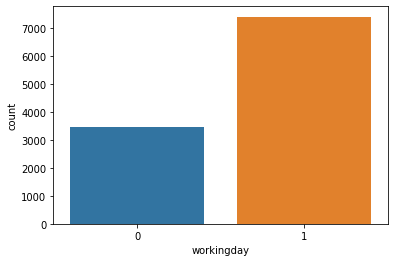

In [ ]:
sns.countplot(x=data['workingday'],data=data)

In [ ]:
data.groupby('workingday').sum()['count']

workingday
0     654872
1    1430604
Name: count, dtype: int64

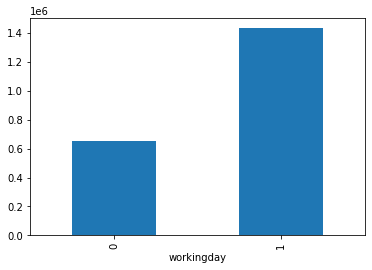

In [ ]:
#On Working day have people have rented more bikes.
data.groupby('workingday').sum()['count'].plot.bar()

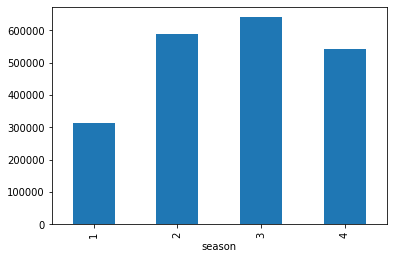

In [ ]:
#In Season3(fall) maximum bike have been rented.
data.groupby('season').sum()['count'].plot.bar()

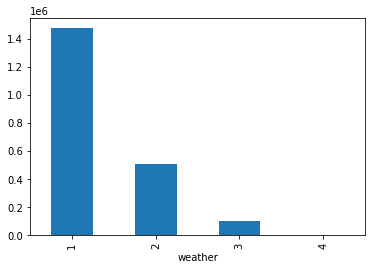

In [ ]:
#In Weather category 1(Clear, Few clouds, partly cloudy, partly cloudy) had more number of rented bikes.
data.groupby('weather').sum()['count'].plot.bar()

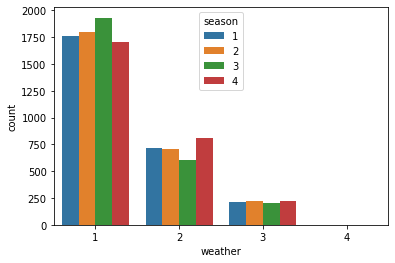

In [ ]:
#In weather 1 season 3 have more number of bike.
sns.countplot(x=data['weather'],data=data,hue='season')

In [ ]:
data[data['weather']==4]['season']

5631    1
Name: season, dtype: int64

# T test(two sample)

Conclusion: **Working Day has effect on number of electric cycles rented**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


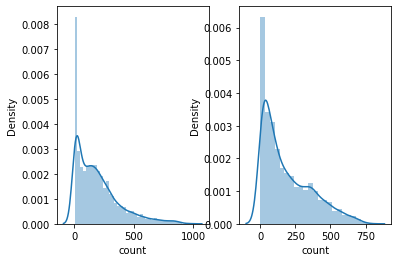

In [ ]:
#H0: u1=u2(Working Day has no effect on number of electric cycles rented)
#Ha: u1!=u2(Working Day has effect on number of electric cycles rented)
#alpha=5%
#As our pValue(22.64%>alpha(5%)) so we accept the null hypothesis.

d1=data[data['workingday']==1]
d2=data[data['workingday']==0]
plt.subplot(1,2,1)
sns.distplot(d1['count'])  #looks like right skewed
plt.subplot(1,2,2)
sns.distplot(d2['count'])   #looks like right skewed


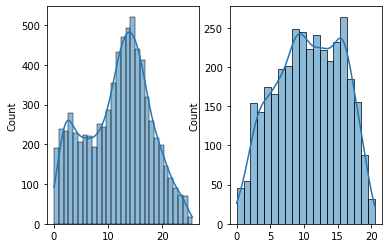

In [ ]:
#applying box-cox transform
log1,_=stats.boxcox(d1['count'])
log2,_=stats.boxcox(d2['count'])
plt.subplot(1,2,1)
sns.histplot(log1,kde=True)
plt.subplot(1,2,2)
sns.histplot(log2,kde=True)
#sns.histplot(d1,kde=True)
#plt.show()
#stats.ttest_ind(a=d1['count'], b=d2['count'])

In [ ]:
log1

array([ 2.11052873,  0.77683649,  0.        , ..., 13.10103978,
       11.77678764, 10.04884639])

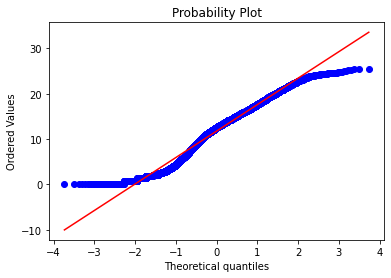

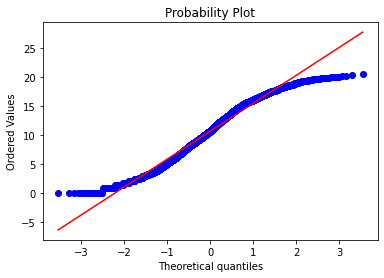

In [ ]:
fig,axi=plt.subplots()
prob=stats.probplot(log1,dist=stats.norm,plot=axi)
fig,axi=plt.subplots()
prob=stats.probplot(log2,dist=stats.norm,plot=axi)

In [ ]:
#As our pValue < alpha(5%), so we reject the null hypothesis. and Accept the alternative hypothesis.
stats.ttest_ind(a=log1, b=log2)

Ttest_indResult(statistic=9.700433069624191, pvalue=3.690834732852787e-22)

# Anova Test


Conclusion:**No. of cycles rented different in different seasons**

In [ ]:
#H0=No. of cycles rented similar in different seasons
#Ha=No. of cycles rented different in different seasons
#alpha=5%
d3=data[data['season']==1]
d4=data[data['season']==2]
d5=data[data['season']==3]
d6=data[data['season']==4]
a1=(np.log(d3['count']))
a2=(np.log(d4['count']))
a3=(np.log(d5['count']))
a4=(np.log(d6['count']))

In [ ]:
from scipy.stats import f_oneway
f_oneway(a1,a2,a3,a4)

F_onewayResult(statistic=192.44768979509686, pvalue=1.3071364586238867e-121)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

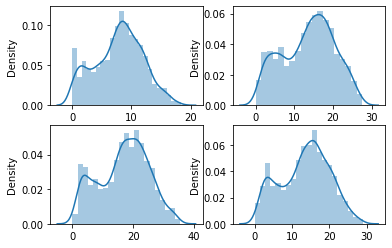

In [ ]:
log3,_=stats.boxcox(d3['count'])
log4,_=stats.boxcox(d4['count'])
log5,_=stats.boxcox(d5['count'])
log6,_=stats.boxcox(d6['count'])
plt.subplot(2,2,1)
sns.distplot(log3)
plt.subplot(2,2,2)
sns.distplot(log4)
plt.subplot(2,2,3)
sns.distplot(log5)
plt.subplot(2,2,4)
sns.distplot(log6)

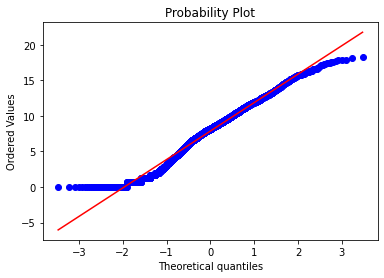

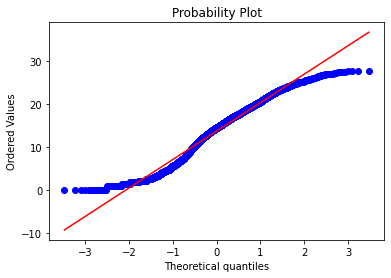

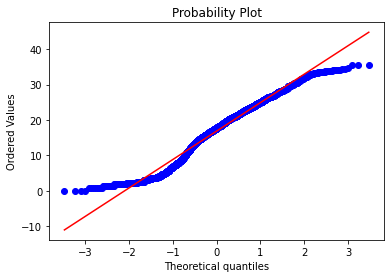

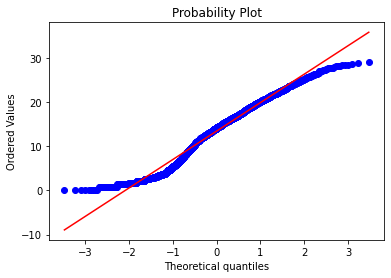

In [ ]:
#QQ Plot
fig,axi=plt.subplots()
prob=stats.probplot(log3,dist=stats.norm,plot=axi)
fig,axi=plt.subplots()
prob=stats.probplot(log4,dist=stats.norm,plot=axi)
fig,axi=plt.subplots()
prob=stats.probplot(log5,dist=stats.norm,plot=axi)
fig,axi=plt.subplots()
prob=stats.probplot(log6,dist=stats.norm,plot=axi)

In [ ]:
from scipy.stats import f_oneway
f_oneway(log3,log4,log5,log6)

F_onewayResult(statistic=890.4936156746095, pvalue=0.0)

Conclusion: **No. of cycles rented different in different weather**

In [ ]:
d7=data[data['weather']==1]
d8=data[data['weather']==2]
d9=data[data['weather']==3]
#d10=data[data['weather']==4]
d10['count']

5631    164
Name: count, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

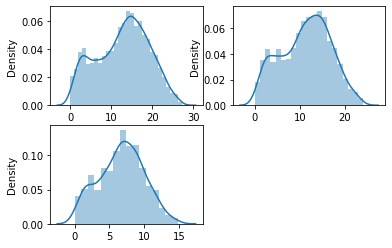

In [ ]:
log7,_=stats.boxcox(d7['count'])
log8,_=stats.boxcox(d8['count'])
log9,_=stats.boxcox(d9['count'])
#log10,_=stats.boxcox(d10['count'])
plt.subplot(2,2,1)
sns.distplot(log7)
plt.subplot(2,2,2)
sns.distplot(log8)
plt.subplot(2,2,3)
sns.distplot(log9)


In [ ]:
f_oneway(log7,log8,log9)

F_onewayResult(statistic=431.79686015294686, pvalue=3.4867243611236345e-181)

# Chi Square Test

Conclusion: **Weather is dependent on the season**

In [ ]:
#H0:Weather is not dependent on the season
#Ha:Weather is dependent on the season
#alpha=5%
from scipy.stats import chi2_contingency
da=pd.crosstab(index=data['weather'],columns=data['season'])
#da=[data['weather'],data['season']]
stat, p, dof, expected = chi2_contingency(da)
p

1.5499250736864862e-07